load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("Cyber_Exodus_Data_final.csv")
df.head(5) 

,Candidate,Title,Job_location,Salary_low,Salary_med,Salary_upper,Remote,Hybrid,On_prem,Source,...,Entry,Mid,Senior,Executive,Experience_level,Salary_s,Commute_S,Per_Crime_S,Prop_Crime_S,Stress
0,0,Information Security Analyst,"Washington, DC",55000.0,67500.0,80000,1,0,0,Indeed,...,1,0,0,0,1,0,0,0,0,0
1,1,Security Systems Analyst | REMOTE,"Washington, DC",84500.0,95750.0,107000,1,0,0,Indeed,...,0,1,0,0,2,1,0,1,1,3
2,0,Intermediate Information Security Analyst,"Washington, DC",75000.0,82500.0,90000,1,0,0,Indeed,...,1,0,0,0,1,0,0,1,0,1
3,0,Cybersecurity Analyst,"Washington, DC",55700.0,63150.0,70600,1,0,0,Indeed,...,1,0,0,0,1,1,0,0,0,1
4,0,Cloud Security Architect,"Washington, DC",120000.0,140000.0,160000,1,0,0,Indeed,...,0,0,1,0,3,1,0,0,0,1


Select columns for SVM

In [3]:
select_columns = ['Candidate','Salary_med','Work_env', 'Buy_rent', 'Weekly_commute', 'Person_crime','Prop_crime','Experience_level']
df1=df[select_columns].copy()
df1.head(5) 

,Candidate,Salary_med,Work_env,Buy_rent,Weekly_commute,Person_crime,Prop_crime,Experience_level
0,0,67500.0,1,0,0,1,3,1
1,1,95750.0,1,0,0,4,5,2
2,0,82500.0,1,0,0,5,4,1
3,0,63150.0,1,0,0,1,3,1
4,0,140000.0,1,1,0,1,3,3


In [4]:
X=df1.drop(['Candidate'], axis=1)

In [5]:
y=df1['Candidate']

Build training and test data set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaler data standardization

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM Classifier C=1.0 -no difference in C value on earlier runs

In [8]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

Logistic Regression Classifier

In [9]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

SVM Predication

In [10]:
svm_predictions = svm_classifier.predict(X_test_scaled)
logistic_predictions = logistic_classifier.predict(X_test_scaled)

Accuracy 

In [11]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

In [12]:
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

SVM Accuracy: 0.98
Logistic Regression Accuracy: 0.97


Confusion Matrix and reports

In [13]:
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

In [14]:
print("\nSVM Confusion Matrix:")
print(svm_confusion_matrix)

print("\nLogistic Regression Confusion Matrix:")
print(logistic_confusion_matrix)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))



SVM Confusion Matrix:
[[185   0]
 [  6  53]]

Logistic Regression Confusion Matrix:
[[185   0]
 [  7  52]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       185
           1       1.00      0.90      0.95        59

    accuracy                           0.98       244
   macro avg       0.98      0.95      0.97       244
weighted avg       0.98      0.98      0.97       244


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       185
           1       1.00      0.88      0.94        59

    accuracy                           0.97       244
   macro avg       0.98      0.94      0.96       244
weighted avg       0.97      0.97      0.97       244



In [15]:
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [16]:
cm = confusion_matrix(y_test, svm_predictions)

<Axes: >

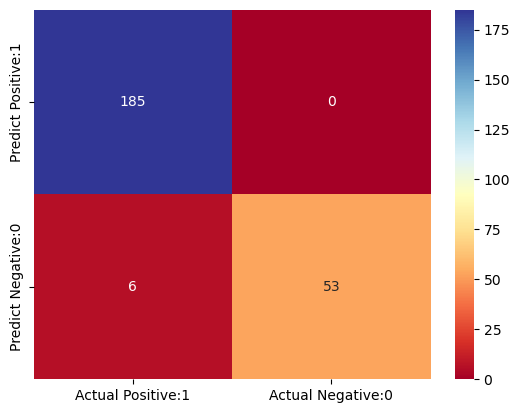

In [17]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlBu')

logistic regression heatmat

In [18]:
lr = confusion_matrix(y_test, logistic_predictions)

<Axes: >

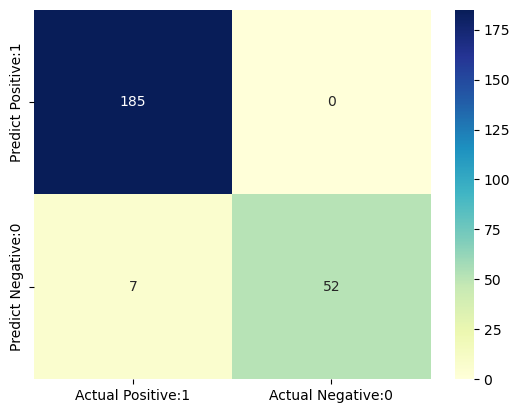

In [19]:
lr_matrix = pd.DataFrame(data=lr, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='YlGnBu')